<a href="https://colab.research.google.com/github/nigam-aditya/thermal_screening_project/blob/main/thermal_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

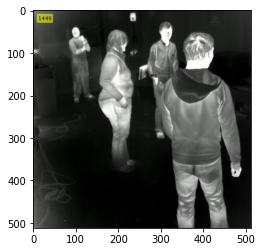

In [5]:
image = read_image("/content/image source/rawimage.png")
plt.imshow(image)